<a href="https://colab.research.google.com/github/Mai-Thanh-Thuan-15-4-2/Machine_Learning_Middle_Project/blob/master/GiuakiML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MachineLearning'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MachineLearning


In [ ]:
#load data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [ ]:
data

In [ ]:
# Lấy ra các giá trị khác nhau của cột area
unique_area = data['area'].unique()

# Sắp xếp các giá trị khác nhau của cột area theo thứ tự tăng dần
sorted_area = pd.Series(unique_area).sort_values()
# Cấu hình Pandas hiển thị toàn bộ các hàng
pd.set_option('display.max_rows', None)
# In kết quả
print("Các giá trị khác nhau của cột area:")
print(sorted_area)

Các giá trị khác nhau của cột area:
0         0.00
103       0.09
118       0.17
108       0.21
107       0.24
212       0.33
1         0.36
138       0.41
2         0.43
3         0.47
120       0.52
210       0.54
4         0.55
5         0.61
106       0.68
6         0.71
204       0.72
104       0.75
102       0.76
7         0.77
117       0.79
8         0.90
9         0.95
10        0.96
146       1.01
11        1.07
169       1.09
131       1.10
12        1.12
13        1.19
213       1.23
167       1.26
233       1.29
14        1.36
112       1.38
15        1.43
16        1.46
156       1.47
109       1.52
17        1.56
141       1.58
18        1.61
19        1.63
20        1.64
21        1.69
164       1.72
22        1.75
228       1.76
23        1.90
24        1.94
25        1.95
236       2.00
26        2.01
163       2.03
235       2.07
153       2.13
27        2.14
247       2.17
147       2.18
230       2.21
28        2.29
206       2.35
200       2.44
105       2.47
29  

In [ ]:
min_area = data['area'].min()
max_area = data['area'].max()
mean_area = data['area'].mean()
std_area = data['area'].std()
# Xác định các ngưỡng cho diện tích rừng bị cháy
thresholds = [min_area, 0.0000001, mean_area, std_area]
# Phân loại các trường hợp cháy rừng thành các lớp tương ứng
data['fire_class'] = pd.cut(data['area'], bins=thresholds + [float('inf')], right=False,
                            labels=[0, 1, 2, 3])

# Hiển thị kết quả
print(data[['area', 'fire_class']])

      area fire_class
0     0.00          0
1     0.00          0
2     0.00          0
3     0.00          0
4     0.00          0
..     ...        ...
512   6.44          1
513  54.29          2
514  11.16          1
515   0.00          0
516   0.00          0

[517 rows x 2 columns]


In [ ]:
#Kiểm tra các dữ liệu có null hay không
print(data.isnull().sum())

X             0
Y             0
month         0
day           0
FFMC          0
DMC           0
DC            0
ISI           0
temp          0
RH            0
wind          0
rain          0
area          0
fire_class    0
dtype: int64


In [ ]:
#Xử lý dữ liệu ngày tháng đổi chữ thành số
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['month'] = data['month'].map(month_map)
day_map = {'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6, 'sat':7,
             'sun':8}
data['day'] = data['day'].map(day_map)


In [ ]:
# Trích chọn đặc trưng
X = data.drop(['area'], axis=1)

y = data['area']

# Sử dụng SelectKBest để lấy 5 đặc trưng tốt nhất
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# Lấy danh sách các đặc trưng tốt nhất
best_features = X.columns[selector.get_support()]
best_features_df = X[best_features].copy()

# Lưu vào file csv mới
best_features_df.to_csv('best_features.csv', index=False)
# Hiển thị danh sách các đặc trưng tốt nhất đã được lựa chọn
print(best_features)

Index(['X', 'DMC', 'temp', 'RH', 'fire_class'], dtype='object')


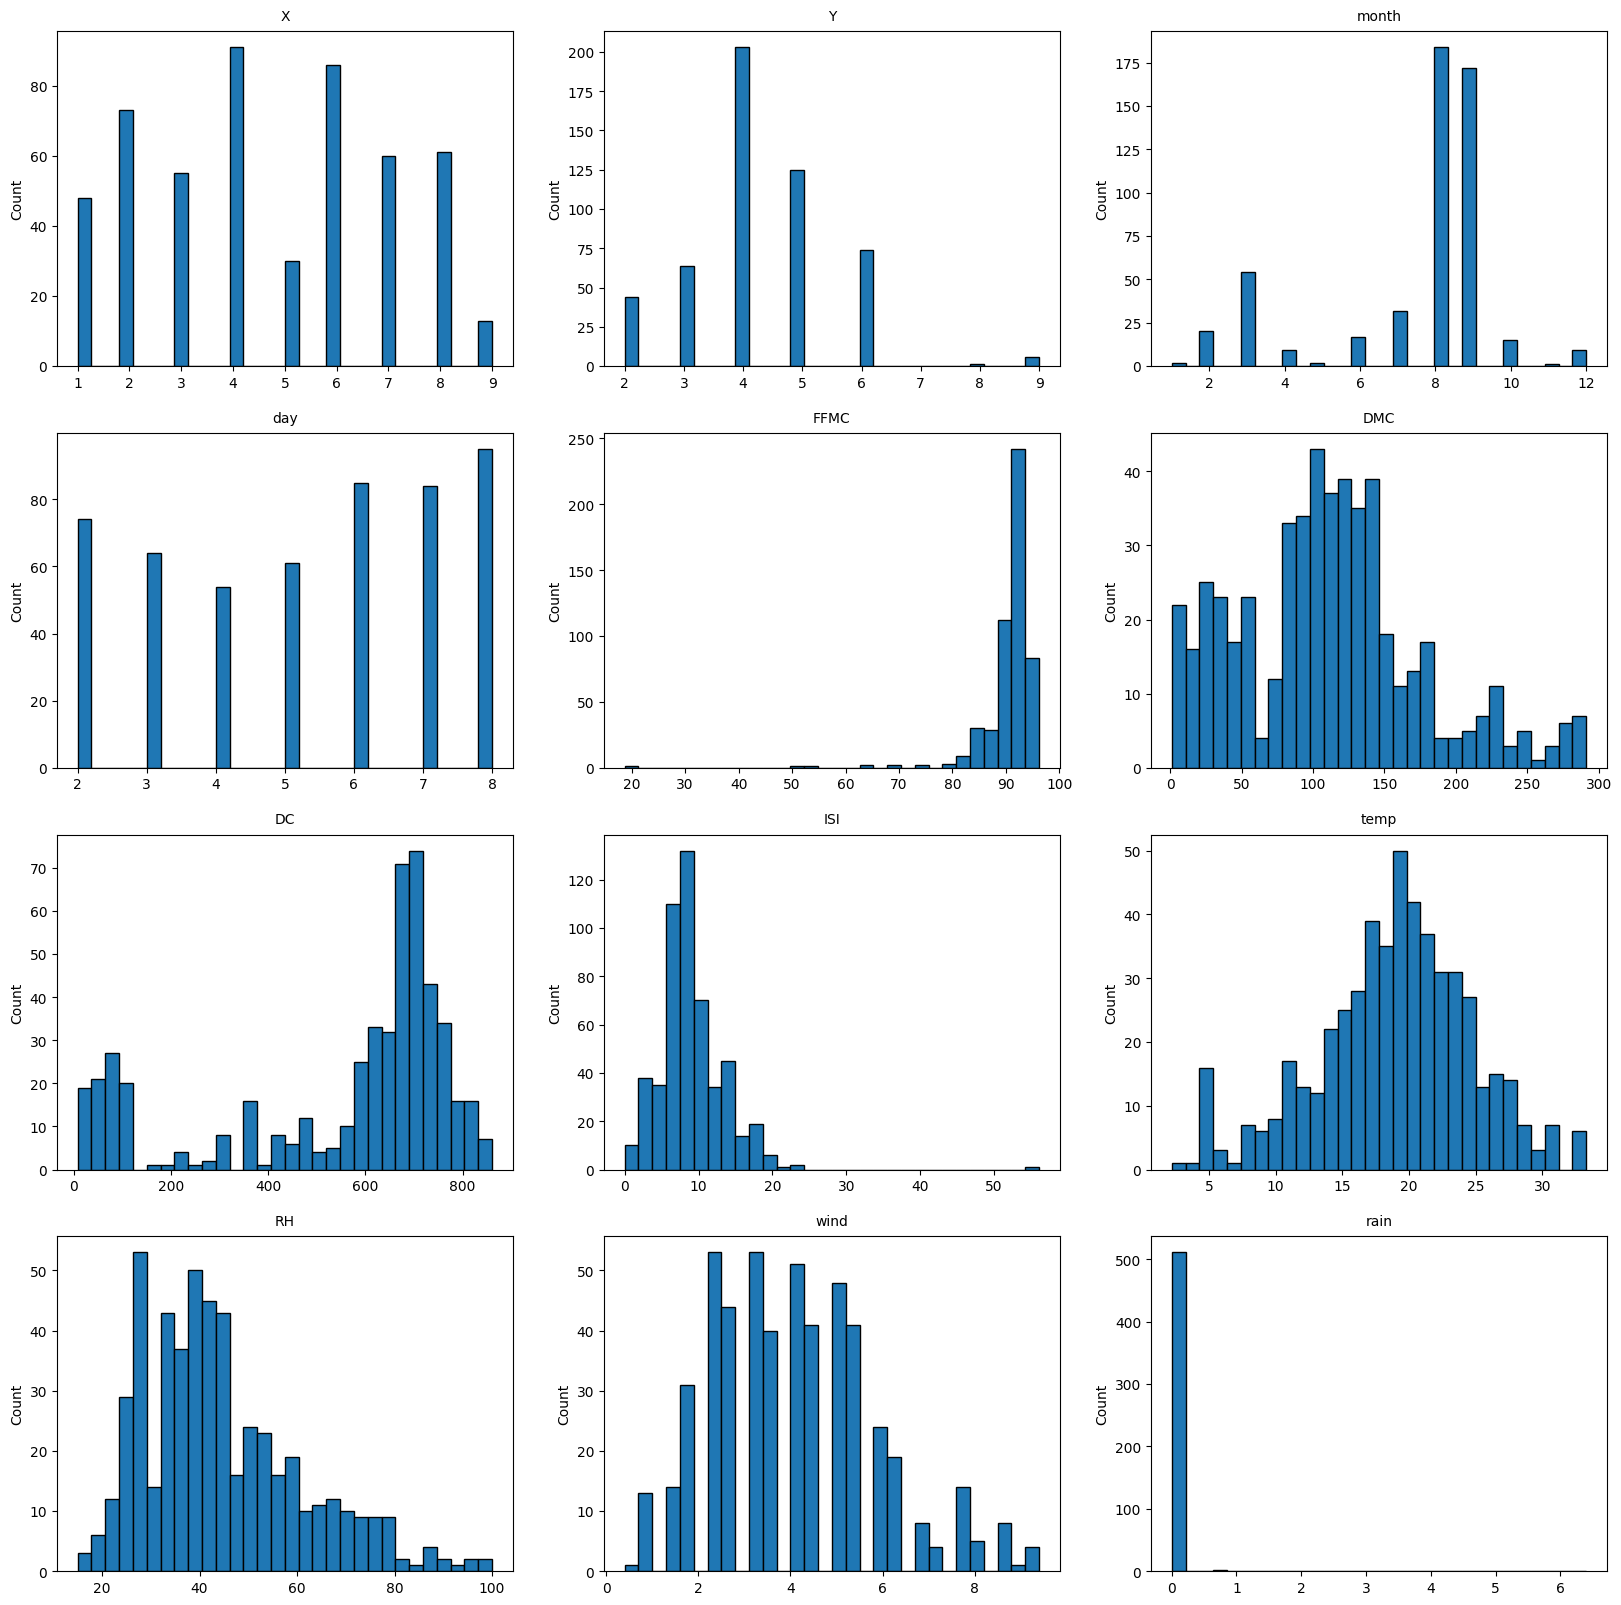

In [ ]:
#vẽ biểu đồ phân bố
numerical = data.iloc[:, :-1].select_dtypes(include=np.number).columns.tolist()
categorical = data.iloc[:, :-1].select_dtypes(bool).columns.tolist()
fig, axs = plt.subplots(4, 3, figsize=(20,20))

for ax, feature in zip(axs.flat, numerical):
    ax.hist(data[feature], bins=30,edgecolor="black")
    ax.set_title(feature, fontsize=10, pad=8)
    ax.set(ylabel = 'Count')

In [ ]:
# Loại bỏ cột mục kết quả
X = data.drop('fire_class', axis=1)
y = data['fire_class']
# Chuẩn  dữ liệu đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1].values)
y = data.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm thử
y_pred = svm_model.predict(X_test)
accuracy_lin = round(accuracy_score(y_test, y_pred),3)
precision_lin = round(precision_score(y_test, y_pred, average='weighted'),3)
recall_lin = round(recall_score(y_test, y_pred, average='weighted'),3)
f1_lin = round(f1_score(y_test, y_pred, average='weighted'),3)

In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(svm_model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(svm_model.__class__.__name__), index=False)

In [ ]:
d = pd.read_csv('scores.csv')
d

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.734940,0.773785,0.734940,0.709568
1,0.686747,0.722243,0.686747,0.645746
2,0.722892,0.771872,0.722892,0.693555
3,0.695122,0.752611,0.695122,0.650870
4,0.634146,0.637215,0.634146,0.623165
5,0.638554,0.668044,0.638554,0.575492
6,0.674699,0.699561,0.674699,0.633839
7,0.759036,0.783668,0.759036,0.743580
8,0.743902,0.785317,0.743902,0.720889
9,0.695122,0.722701,0.695122,0.661252


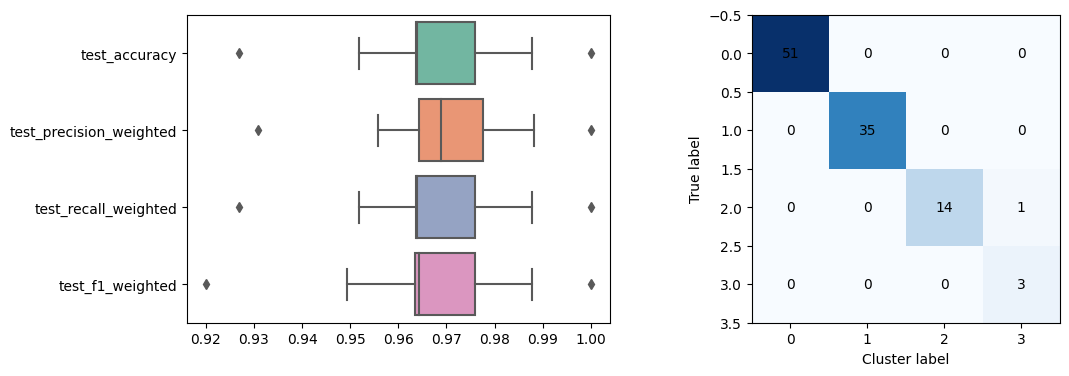

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_lin)
print(precision_lin)
print(recall_lin)
print(f1_lin)

0.702
0.726
0.702
0.664


In [ ]:
svm_model_sig = SVC(kernel='sigmoid')

# Huấn luyện mô hình trên tập huấn luyện
svm_model_sig.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm thử
y_pred_sig = svm_model_sig.predict(X_test)
accuracy_sig = round(accuracy_score(y_test, y_pred_sig),3)
precision_sig = round(precision_score(y_test, y_pred_sig, average='weighted'),3)
recall_sig = round(recall_score(y_test, y_pred_sig, average='weighted'),3)
f1_sig = round(f1_score(y_test, y_pred_sig, average='weighted'),3)



In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_sig = cross_validate(svm_model_sig, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_sig).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(svm_model_sig.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.464032                 0.414755              0.464032   
std         0.041113                 0.036278              0.041113   
min         0.378049                 0.348164              0.378049   
25%         0.451220                 0.397984              0.451220   
50%         0.469880                 0.412048              0.469880   
75%         0.481707                 0.428201              0.481707   
max         0.518072                 0.477250              0.518072   

       test_f1_weighted  
count         15.000000  
mean           0.422609  
std            0.042305  
min            0.354686  
25%            0.389857  
50%            0.421872  
75%            0.439444  
max            0.490178  


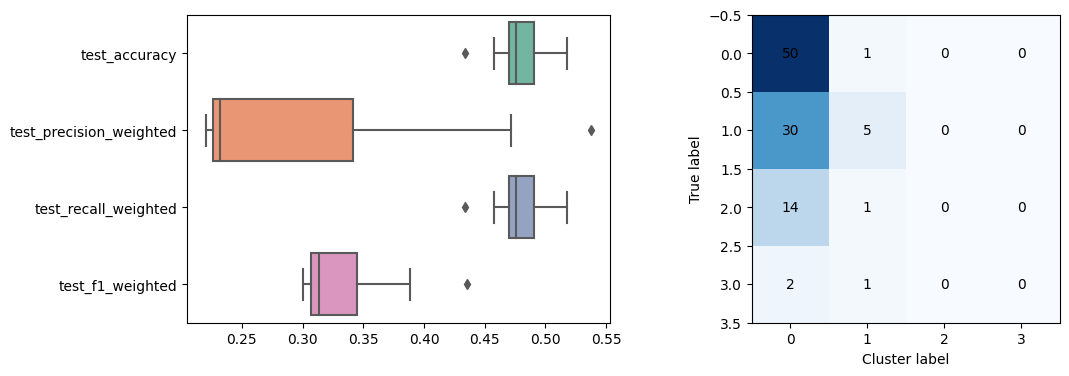

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred_sig)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_sig)
print(precision_sig)
print(recall_sig)
print(f1_sig)

0.529
0.466
0.529
0.412


In [ ]:

svm_model_poly = SVC(kernel='poly')

# Huấn luyện mô hình trên tập huấn luyện
svm_model_poly.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm thử
y_pred_poly = svm_model_poly.predict(X_test)
accuracy_poly = round(accuracy_score(y_test, y_pred_poly),3)
precision_poly = round(precision_score(y_test, y_pred_poly, average='weighted'),3)
recall_poly = round(recall_score(y_test, y_pred_poly, average='weighted'),3)
f1_poly = round(f1_score(y_test, y_pred_poly, average='weighted'),3)


In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_poly = cross_validate(svm_model_poly, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_poly).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(svm_model_poly.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.481036                 0.427227              0.481036   
std         0.029326                 0.086181              0.029326   
min         0.409639                 0.327322              0.409639   
25%         0.463855                 0.364363              0.463855   
50%         0.487805                 0.423617              0.487805   
75%         0.503012                 0.443104              0.503012   
max         0.518072                 0.662801              0.518072   

       test_f1_weighted  
count         15.000000  
mean           0.376044  
std            0.036569  
min            0.330580  
25%            0.351456  
50%            0.364410  
75%            0.391998  
max            0.441888  


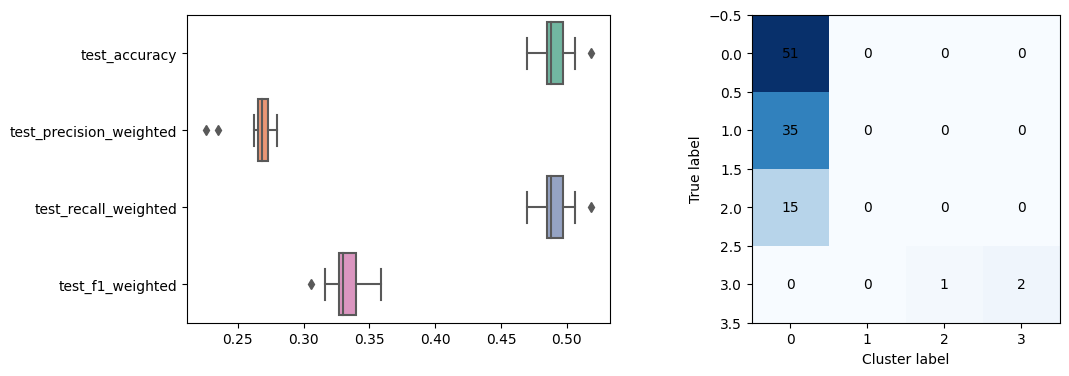

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred_poly)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_poly)
print(precision_poly)
print(recall_poly)
print(f1_poly)

0.51
0.276
0.51
0.352


In [ ]:
#Random Forest

clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred_ran = clf.predict(X_test)

In [ ]:
accuracy_ran = round(accuracy_score(y_test, y_pred_ran),3)
precision_ran = round(precision_score(y_test, y_pred_ran, average='weighted'),3)
recall_ran = round(recall_score(y_test, y_pred_ran, average='weighted'),3)
f1_ran = round(f1_score(y_test, y_pred_ran, average='weighted'),3)

In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_ran = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_ran).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.955637                 0.954411              0.955637   
std         0.019124                 0.020655              0.019124   
min         0.915663                 0.918141              0.915663   
25%         0.939759                 0.941227              0.939759   
50%         0.951807                 0.955902              0.951807   
75%         0.969733                 0.971456              0.969733   
max         0.987952                 0.989157              0.987952   

       test_f1_weighted  
count         15.000000  
mean           0.949278  
std            0.021275  
min            0.911477  
25%            0.933181  
50%            0.945824  
75%            0.965941  
max            0.988173  


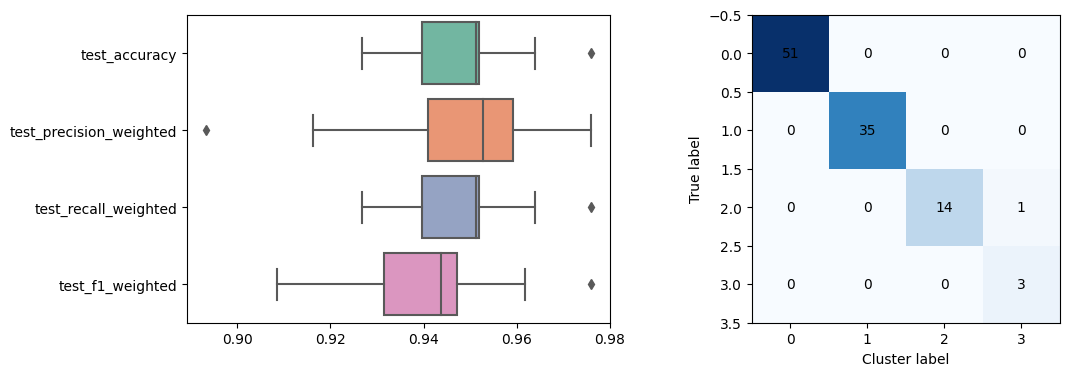

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred_ran)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_ran)
print(precision_ran)
print(recall_ran)
print(f1_ran)

0.981
0.983
0.981
0.981


In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

accuracy_knn = round(accuracy_score(y_test, knn_pred),3)
precision_knn = round(precision_score(y_test, knn_pred, average='weighted'),3)
recall_knn = round(recall_score(y_test, knn_pred, average='weighted'),3)
f1_knn = round(f1_score(y_test, knn_pred, average='weighted'),3)


In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_knn = cross_validate(knn, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_knn).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(knn.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.449447                 0.406067              0.449447   
std         0.054140                 0.048917              0.054140   
min         0.341463                 0.295010              0.341463   
25%         0.415663                 0.373019              0.415663   
50%         0.463415                 0.423601              0.463415   
75%         0.490890                 0.440506              0.490890   
max         0.506024                 0.459196              0.506024   

       test_f1_weighted  
count         15.000000  
mean           0.421357  
std            0.052357  
min            0.316499  
25%            0.387898  
50%            0.435540  
75%            0.460663  
max            0.478077  


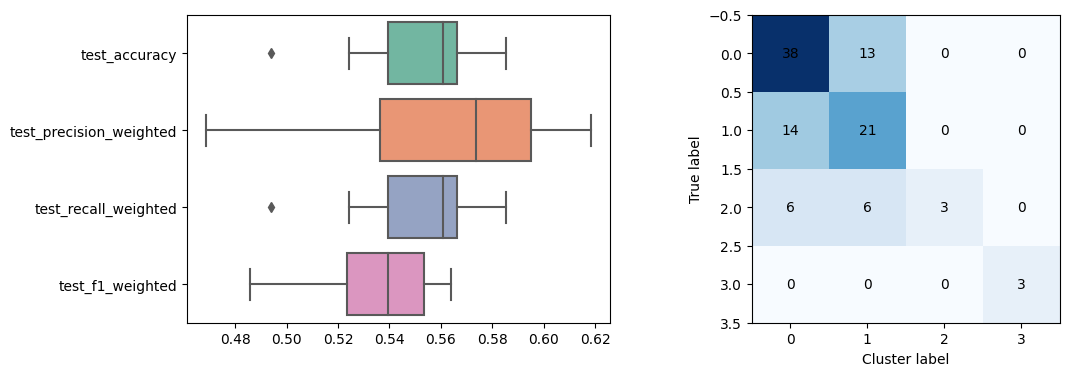

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, knn_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_knn)
print(precision_knn)
print(recall_knn)
print(f1_knn)

0.529
0.457
0.529
0.488


In [ ]:
#Gaussian Naive Bayes
gbn = GaussianNB()
gbn.fit(X_train, y_train)
gbn_pred = gbn.predict(X_test)

In [ ]:
accuracy_gbn = round(accuracy_score(y_test, gbn_pred),3)
precision_gbn = round(precision_score(y_test, gbn_pred, average='weighted'),3)
recall_gbn = round(recall_score(y_test, gbn_pred, average='weighted'),3)
f1_gbn = round(f1_score(y_test, gbn_pred, average='weighted'),3)


In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_gbn = cross_validate(gbn, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_gbn).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(gbn.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.580263                 0.603343              0.580263   
std         0.024338                 0.148479              0.024338   
min         0.524390                 0.501423              0.524390   
25%         0.567073                 0.507630              0.567073   
50%         0.585366                 0.511510              0.585366   
75%         0.593961                 0.707112              0.593961   
max         0.614458                 0.903735              0.614458   

       test_f1_weighted  
count         15.000000  
mean           0.522365  
std            0.024877  
min            0.462145  
25%            0.512740  
50%            0.521056  
75%            0.537966  
max            0.570841  


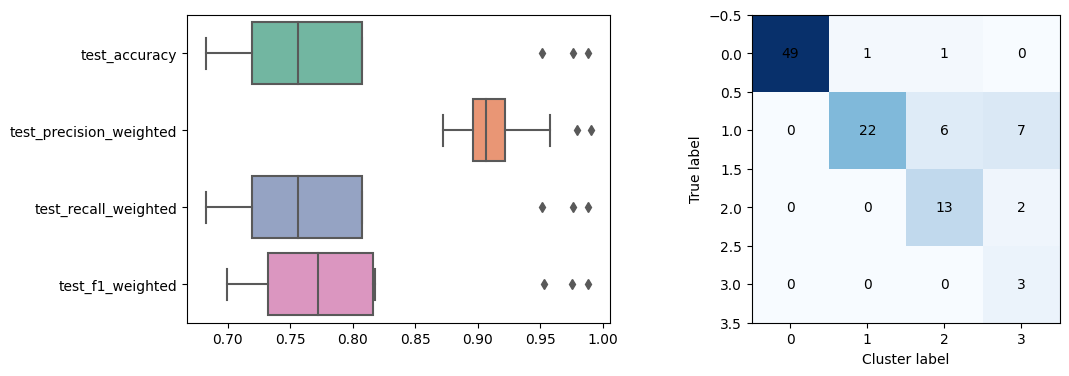

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, gbn_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_gbn)
print(precision_gbn)
print(recall_gbn)
print(f1_gbn)

0.606
0.713
0.606
0.562


In [ ]:
#Decision Tree

tree = tree.DecisionTreeClassifier(max_depth=5)
tree = tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [ ]:
accuracy_tree = round(accuracy_score(y_test, tree_pred),3)
precision_tree = round(precision_score(y_test, tree_pred, average='weighted'),3)
recall_tree = round(recall_score(y_test, tree_pred, average='weighted'),3)
f1_tree = round(f1_score(y_test, tree_pred, average='weighted'),3)

In [ ]:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores_tree = cross_validate(tree, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores_tree).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    cv_scores.to_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(tree.__class__.__name__), index=False)

A. Cross Validation on Training Set
       test_accuracy  test_precision_weighted  test_recall_weighted  \
count      15.000000                15.000000             15.000000   
mean        0.995171                 0.995545              0.995171   
std         0.007630                 0.007096              0.007630   
min         0.975904                 0.977321              0.975904   
25%         0.987952                 0.989290              0.987952   
50%         1.000000                 1.000000              1.000000   
75%         1.000000                 1.000000              1.000000   
max         1.000000                 1.000000              1.000000   

       test_f1_weighted  
count         15.000000  
mean           0.995143  
std            0.007792  
min            0.974763  
25%            0.988211  
50%            1.000000  
75%            1.000000  
max            1.000000  


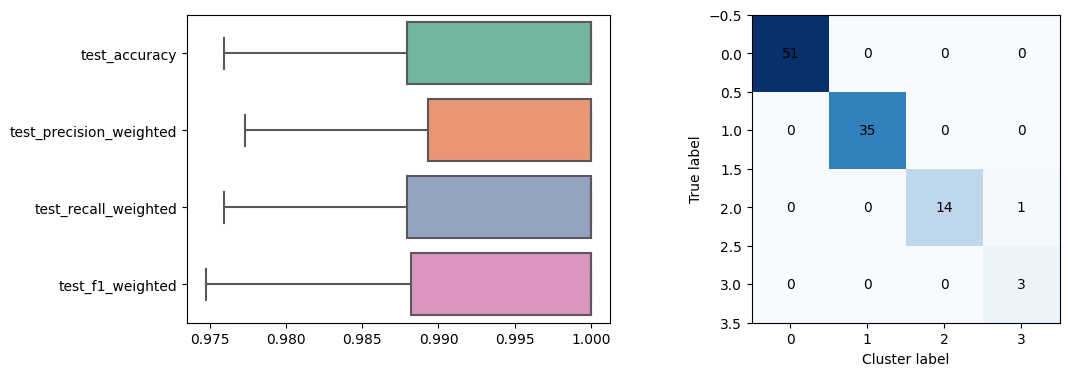

In [ ]:
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, tree_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

In [ ]:
print(accuracy_tree)
print(precision_tree)
print(recall_tree)
print(f1_tree)

0.99
0.993
0.99
0.991


In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [ ]:
df['fire'] = df['area'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(['month', 'day', 'area'], axis=1)

In [ ]:
X_nn = df.drop('fire', axis=1)
y_nn = df['fire']
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

In [ ]:
# Khởi tạo mô hình
model = Sequential()

# Thêm lớp input và lớp ẩn
model.add(Dense(16, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))

# Thêm lớp đầu ra
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Chuyển đổi biến mục tiêu sang dạng số
le = LabelEncoder()
y_train_nn = le.fit_transform(y_train_nn)
y_test_nn = le.transform(y_test_nn)

In [ ]:
history = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 0.2605 - mean_absolute_error: 0.4943 - val_loss: 0.2522 - val_mean_absolute_error: 0.4873
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2558 - mean_absolute_error: 0.4927 - val_loss: 0.2479 - val_mean_absolute_error: 0.4868
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2517 - mean_absolute_error: 0.4910 - val_loss: 0.2451 - val_mean_absolute_error: 0.4857
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2490 - mean_absolute_error: 0.4897 - val_loss: 0.2429 - val_mean_absolute_error: 0.4847
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2465 - mean_absolute_error: 0.4880 - val_loss: 0.2413 - val_mean_absolute_error: 0.4838
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2447 - mean_absolute_error: 0.4865 - val_loss: 0.2406 - val_mean_absolute_error: 0.4833
Epoch 7/50
13/13 [=========

In [ ]:
score = model.evaluate(X_test_nn, y_test_nn)
print('Test loss:', score[0])
print('Test mean absolute error:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2346 - mean_absolute_error: 0.4652
Test loss: 0.23460593819618225
Test mean absolute error: 0.4652080237865448


In [ ]:
nn_pred = model.predict(X_test_nn)

4/4 [==============================] - 0s 3ms/step


In [ ]:
nn_pred = nn_pred > 0.5
accuracy_nn = round(accuracy_score(y_test_nn, nn_pred),3)
precision_nn = round(precision_score(y_test_nn, nn_pred, average='weighted'),3)
f1_nn = round(f1_score(y_test_nn, nn_pred, average="weighted"),3)
recall_nn = round(recall_score(y_test_nn, nn_pred, average="weighted"),3)

print("Accuracy:", accuracy_nn)
print("F1-Score:", f1_nn)
print("Recall:", recall_nn)
print("precision:",precision_nn)

Accuracy: 0.625
F1-Score: 0.622
Recall: 0.625
precision: 0.628


In [ ]:

# Chuyển đổi dự đoán về dạng nhãn lớp
nn_pred = (nn_pred > 0.5).astype(int)

# Tính toán confusion matrix
cm = confusion_matrix(y_test_nn, nn_pred)

# In confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[27 24]
 [15 38]]


In [ ]:
from prettytable import PrettyTable
table = PrettyTable(['','accuracy','precision','recall','f1'])

In [ ]:
table.add_row(['Neural Network',accuracy_nn,precision_nn,recall_nn,f1_nn])
table.add_row(['SVM_linear',accuracy_lin,precision_lin,recall_lin,f1_lin])
table.add_row(['SVM_sigmod',accuracy_sig,precision_sig,recall_sig,f1_sig])
table.add_row(['SVM_poly',accuracy_poly,precision_poly,recall_poly,f1_poly])
table.add_row(['Knn',accuracy_knn,precision_knn,recall_knn,f1_knn])
table.add_row(['Naive Bayes',accuracy_gbn,precision_gbn,recall_gbn,f1_gbn])
table.add_row(['Random Forest',accuracy_ran,precision_ran,recall_ran,f1_ran])
table.add_row(['Decision Tree',accuracy_tree,precision_tree,recall_tree,f1_tree])
print(table)

+----------------+----------+-----------+--------+-------+
|                | accuracy | precision | recall |   f1  |
+----------------+----------+-----------+--------+-------+
| Neural Network |  0.644   |    0.65   | 0.644  | 0.639 |
|   SVM_linear   |  0.702   |   0.726   | 0.702  | 0.664 |
|   SVM_sigmod   |  0.413   |   0.319   | 0.413  | 0.353 |
|    SVM_poly    |  0.519   |   0.498   | 0.519  | 0.403 |
|      Knn       |  0.529   |   0.457   | 0.529  | 0.488 |
|  Naive Bayes   |  0.606   |   0.713   | 0.606  | 0.562 |
| Random Forest  |  0.981   |   0.983   | 0.981  | 0.981 |
| Decision Tree  |   0.99   |   0.993   |  0.99  | 0.991 |
+----------------+----------+-----------+--------+-------+


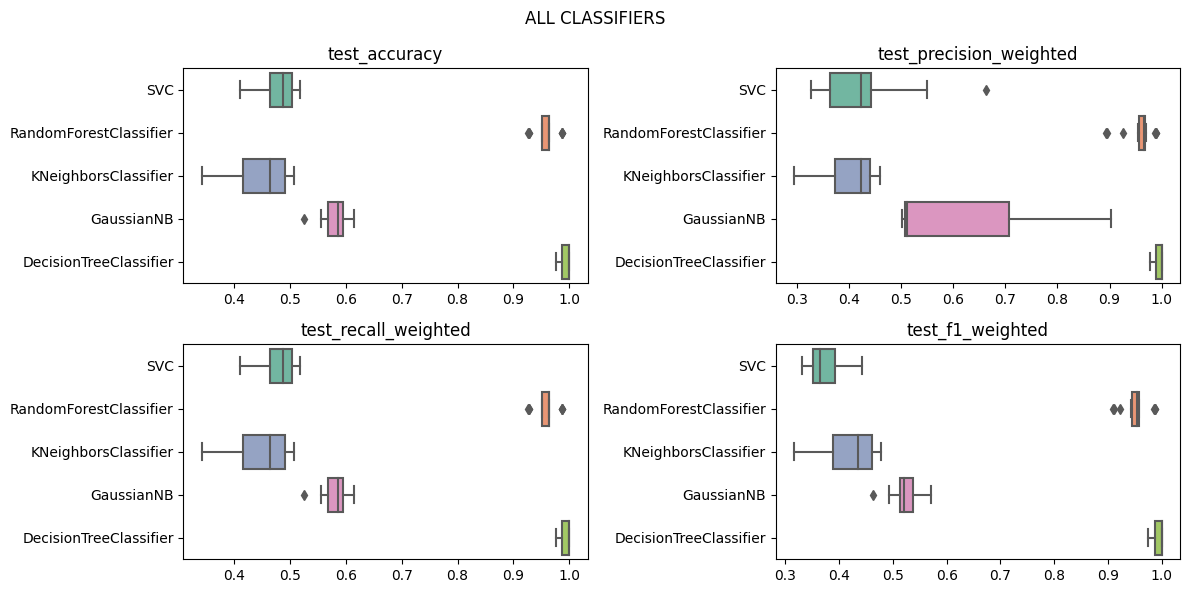

In [ ]:
clf_names = ['SVC', 'RandomForestClassifier',
            'KNeighborsClassifier', 'GaussianNB','DecisionTreeClassifier']
score_names = ['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']

def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('/content/gdrive/MyDrive/MachineLearning/GiuKi/data/{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}

    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

build_plots('ALL CLASSIFIERS')


